# <h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h4>Ηλιάδης Θρασύβουλος 03115761</h4>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [166]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import itertools

In [167]:
import warnings
warnings.filterwarnings('ignore')

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [168]:
n=110
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

REG.graph['pos']= nx.circular_layout(REG)
RGER.graph['pos']= nx.spring_layout(RGER)
RGG.graph['pos'] = nx.get_node_attributes(RGG, 'pos')
SF.graph['pos'] = nx.spring_layout(SF)
SW.graph['pos'] = nx.spring_layout(SW)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [195]:
#import football.gml from local file using nx.read_gml

# THAT'S NOT FOOTBALL!

# Get the path to football.gml right if it doesn't work!

G1 = nx.read_gml('football.gml')

In [170]:
#check if football is directed
print(nx.is_directed(G1))

False


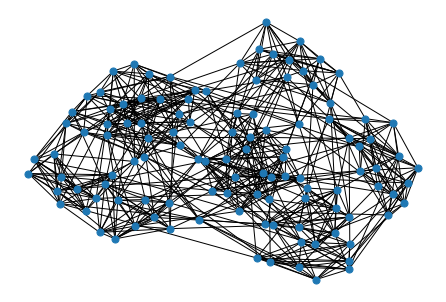

In [171]:
#visualize football
nx.draw(G1, node_size=50)
plt.show()

In [172]:
#import lesmis.gml
G2 = nx.read_gml('lesmis.gml')

In [173]:
#check if lesmis is directed
print(nx.is_directed(G2))

False


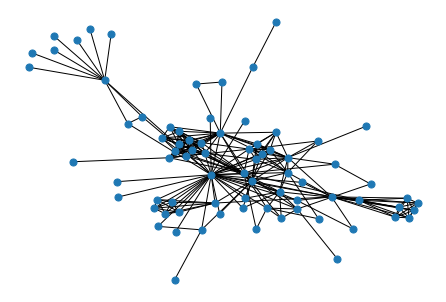

In [174]:
#visualize lesmis
nx.draw(G2, node_size=50)
plt.show()

In [175]:
#import dolphins.gml
G3 = nx.read_gml('dolphins.gml')

In [176]:
#check if dolphins is directed
print(nx.is_directed(G3))

False


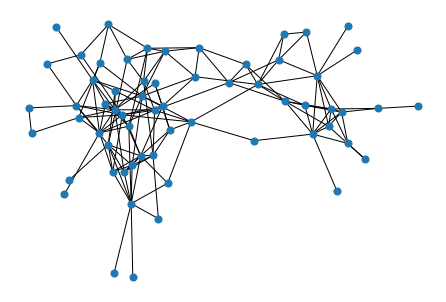

In [177]:
#visualize dolphins
nx.draw(G3, node_size=50)
plt.show()

In [178]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(G1,0)
nlesmis, lesmis_map=conv2int(G2,0)
ndolphins, dolphins_map=conv2int(G3,0)

#G=nx.relabel_nodes(nG,G_mapping)

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [179]:
def find_degree(G):
    return np.array([v for (u, v) in nx.degree(G)])


REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(G1)
lesmis_degree = find_degree(G2)
dolphins_degree = find_degree(G3)

def degree_hist(G_degree):
    return G_degree.mean()

mean_degree_REG = degree_hist(REG_degree)
mean_degree_RGER = degree_hist(RGER_degree)
mean_degree_RGG = degree_hist(RGER_degree)
mean_degree_SW = degree_hist(SW_degree)
mean_degree_SF = degree_hist(SF_degree)
mean_degree_football = degree_hist(football_degree)
mean_degree_lesmis = degree_hist(lesmis_degree)
mean_degree_dolphins = degree_hist(dolphins_degree)

# print(REG_degree, mean_degree_REG)
# print(RGER_degree, mean_degree_RGER)
# print(football_degree, mean_degree_football)

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [180]:
def clust_coef(G):
    return(nx.clustering(G))

REG_cc = clust_coef(REG)
RGER_cc = clust_coef(RGER)
RGG_cc = clust_coef(RGG)
SF_cc = clust_coef(SF)
SW_cc = clust_coef(SW)
football_cc = clust_coef(G1)
lesmis_cc = clust_coef(G2)
dolphins_cc = clust_coef(G3)

def cc_hist(G_cc):
    return nx.average_clustering(G_cc)

mean_cc_REG = cc_hist(REG)
mean_cc_RGER = cc_hist(RGER)
mean_cc_RGG = cc_hist(RGG)
mean_cc_SW = cc_hist(SW)
mean_cc_SF = cc_hist(SF)
mean_cc_football = cc_hist(G1)
mean_cc_lesmis = cc_hist(G2)
mean_cc_dolphins = cc_hist(G3)

# print(football_cc, mean_cc_football)

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

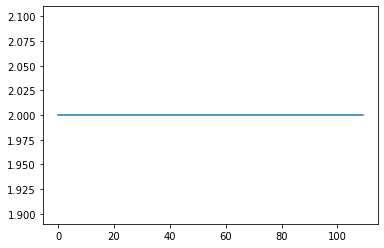

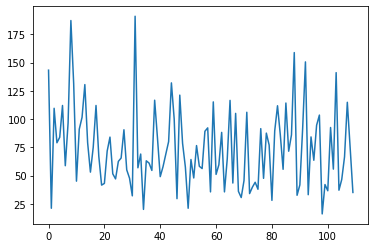

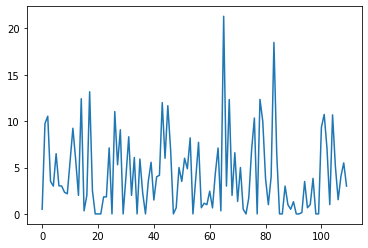

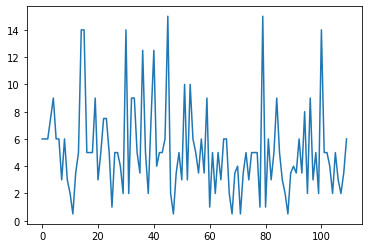

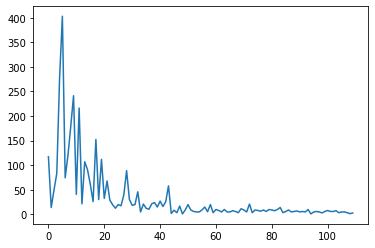

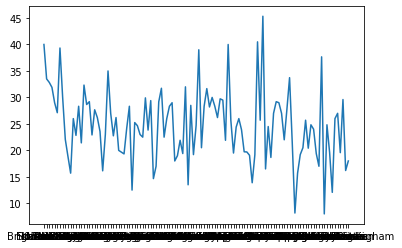

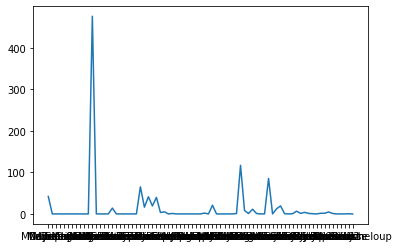

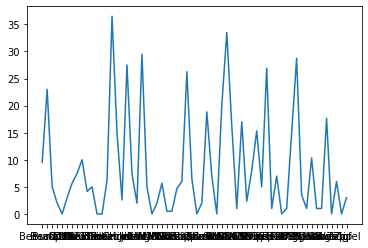

In [181]:
#def ego_centrality(topology):
def ego_centrality(G):
    centrality = {}
    for node in G:
        G_ego = nx.ego_graph(G, node)
        A = nx.adjacency_matrix(G_ego).todense()
        A = np.multiply(A ** 2, np.ones_like(A) - A)
        A = np.triu(A, 1)
        entries = A[A != 0]
        centrality[node] = sum(1 / entries)
    return centrality

REG_ebtw = ego_centrality(REG)
RGER_ebtw = ego_centrality(RGER)
RGG_ebtw = ego_centrality(RGG)
SF_ebtw = ego_centrality(SF)
SW_ebtw = ego_centrality(SW)
nfootball_ebtw = ego_centrality(G1)
nlesmis_ebtw = ego_centrality(G2)
ndolphins_ebtw = ego_centrality(G3)

def egobtw_hist(G_ebtw):
    
    plt.plot(list(G_ebtw.keys()), list(G_ebtw.values()))
    plt.show()

mean_ebtw_REG = egobtw_hist(REG_ebtw)
mean_ebtw_RGER = egobtw_hist(RGER_ebtw)
mean_ebtw_RGG = egobtw_hist(RGG_ebtw)
mean_ebtw_SW = egobtw_hist(SW_ebtw)
mean_ebtw_SF = egobtw_hist(SF_ebtw)
mean_ebtw_football = egobtw_hist(nfootball_ebtw)
mean_ebtw_lesmis = egobtw_hist(nlesmis_ebtw)
mean_ebtw_dolphins = egobtw_hist(ndolphins_ebtw)

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση networkx.algorithms.community.quality.modularity.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [182]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [183]:
# girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
# use nx.algorithms.community.centrality.girvan_newman for the communities
# nx.algorithms.community.quality.modularity to measure modularity

def comd_GN(G,k):
    max_modularity = 0
    communities=[]
    clustering = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, clustering)
    for community in limited:
        community_modularity = nx.algorithms.community.quality.modularity(G, community)
        if (community_modularity > max_modularity):
            result = tuple(community)
            max_modularity = community_modularity
    return(result)
    


<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [184]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_SP(G,k):
    result_clustering = ()
    max_modularity = 0
    for i in range(1, k + 1):
#         print(type(G))
        # Because G is a graph we use its adjacency matrix
        G_adj = nx.to_numpy_matrix(G)
        sc = SpectralClustering(n_clusters=i, affinity='precomputed').fit_predict(G_adj) # n_init is 10 by default
        # We have to manually create the partition from the 'labels' array
        
        part_array = [[] for x in range(i)]
        result = []
        for node, label in zip(G, sc):
            part_array[label].append(node)
            
        for j in range(len(part_array)):
            result.append(set(part_array[j]))
#             print(type(part_array))        
#         print(part_array)
#         print(tuple(result))
        community_modularity = nx.algorithms.community.quality.modularity(G, result)
        if (community_modularity > max_modularity):
            result_clustering = tuple(result)
            max_modularity = community_modularity
    return(result_clustering)

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [185]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_MM(G):
    return(tuple(nx.algorithms.community.modularity_max.greedy_modularity_communities(G)))

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [186]:
def visual_com(G):
    comd_GN_vis(G)
    comd_SP_vis(G)
    comd_MM_vis(G)

#use from networkx: draw_networkx_nodes (and the attribute nodelist), and draw_networkx_edges

def comd_GN_vis(G):
    partitioning = comd_GN(G, 50)
    if G in [G1, G2, G3]:
        pos = nx.spring_layout(G)
        print("yes")
    else:
        pos = G.graph['pos']
        
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle("Communities from Newman-Girvan method")
    ax = plt.gca()
    for partition, color in zip(partitioning, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()

def comd_SP_vis(G):
    partitioning = comd_SP(G, 50)
    if G in [G1, G2, G3]:
        pos = nx.spring_layout(G)
        print("yes")
    else:
        pos = G.graph['pos']
        
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle("Communities from Spectral Clustering method")
    ax = plt.gca()
    for partition, color in zip(partitioning, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()

def comd_MM_vis(G):
    partitioning = comd_MM(G)
    if G in [G1, G2, G3]:
        pos = nx.spring_layout(G)
        print("yes")
    else:
        pos = G.graph['pos']
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle("Communities from Modularity Maximization")
    ax = plt.gca()
    for partition, color in zip(partitioning, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=partition, node_size=40, node_color=color, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos,  ax=ax, edge_color='gray')
    plt.show()
    

<p>a. Οπτικοποίηση κοινοτήτων Les Miserables.</p>

yes


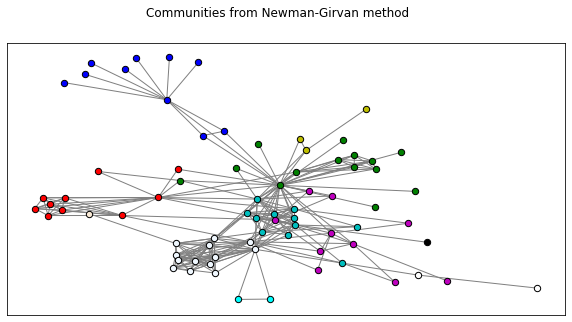

yes


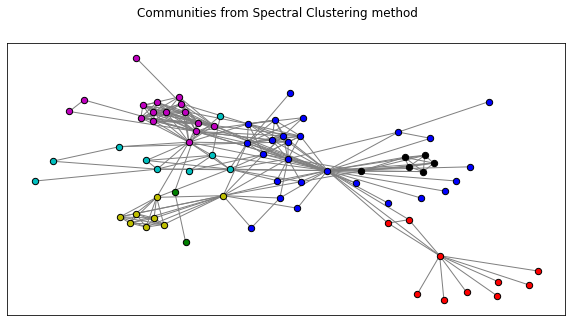

yes


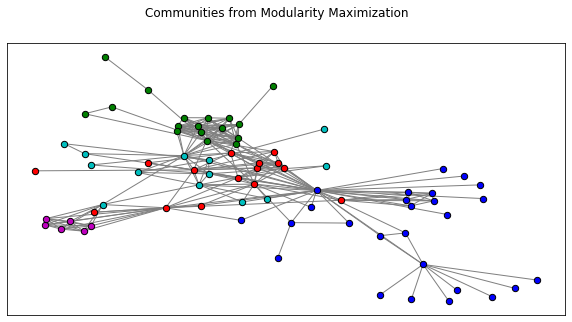

In [187]:
visual_com(G2)

<p>b. Οπτικοποίηση κοινοτήτων American College Football.</p>

yes


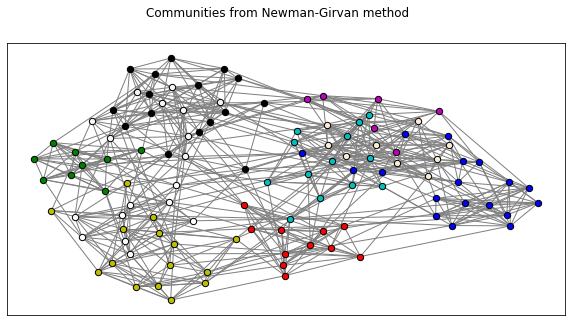

yes


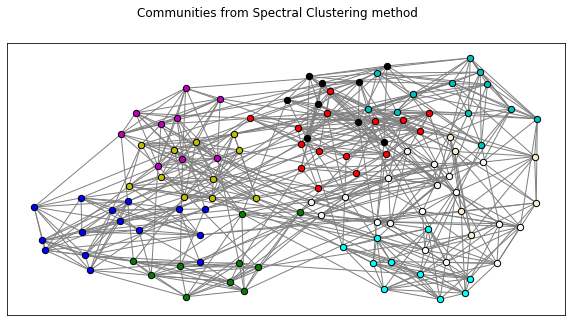

yes


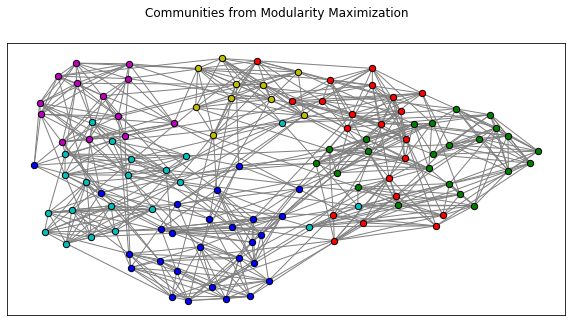

In [188]:
visual_com(G1)

<p>c. Οπτικοποίηση κοινοτήτων Dolphins.</p>

yes


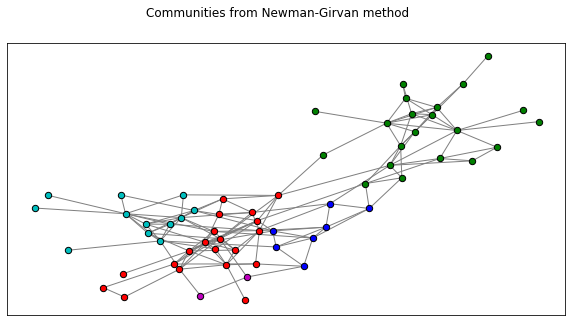

yes


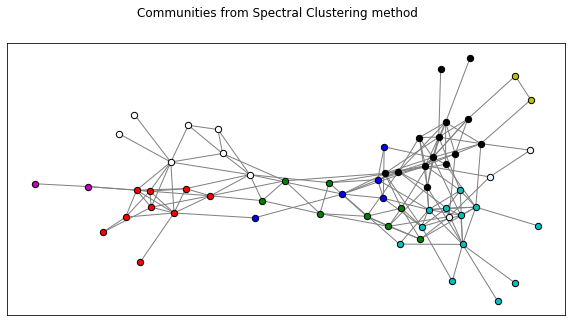

yes


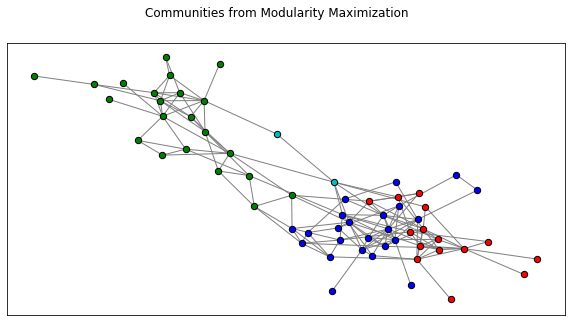

In [189]:
visual_com(G3)

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

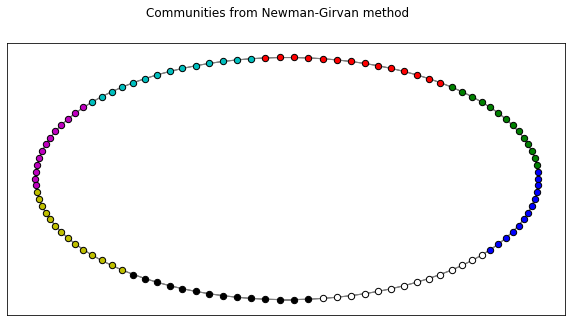

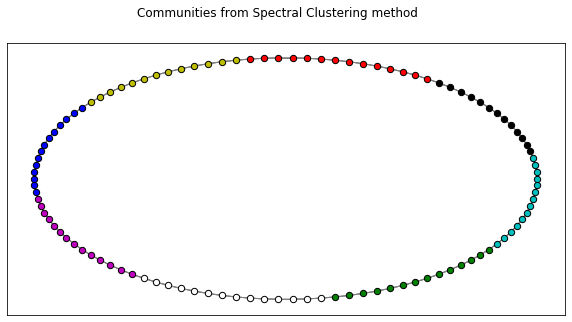

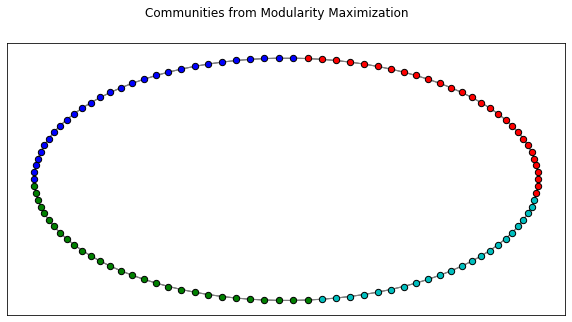

In [190]:
visual_com(REG)

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

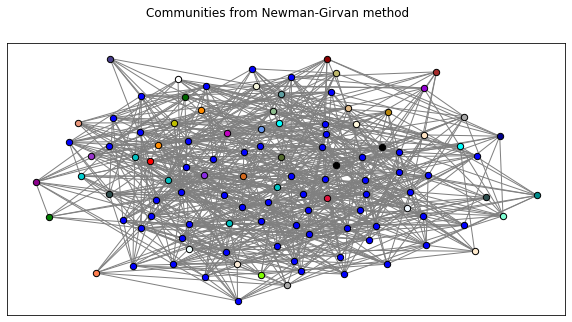

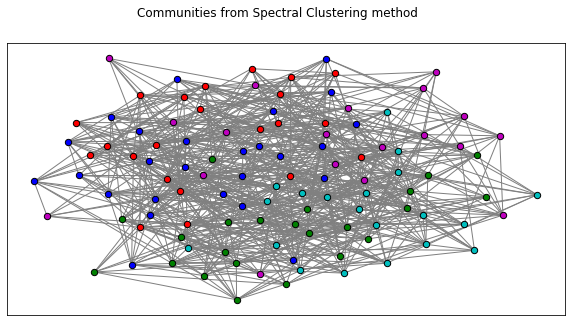

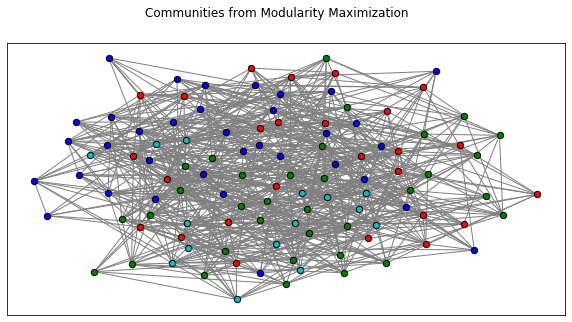

In [191]:
visual_com(RGER)

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

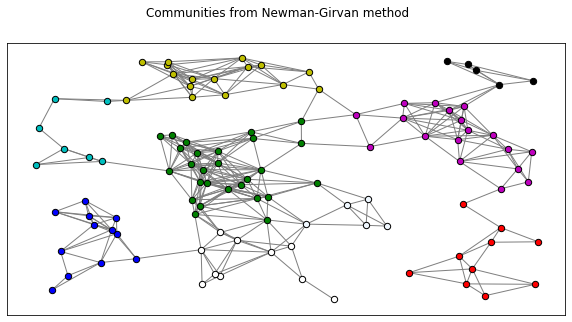

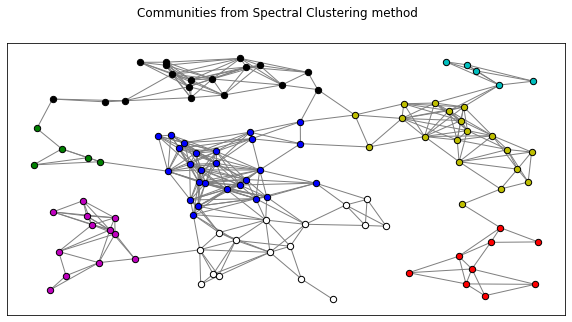

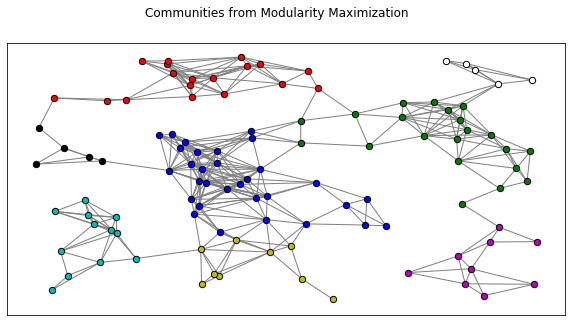

In [192]:
visual_com(RGG)

<p>g. Οπτικοποίηση κοινοτήτων SW.</p>

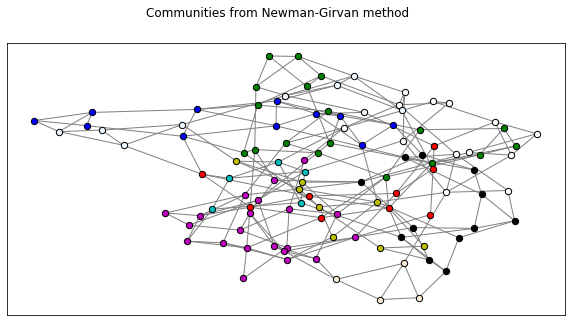

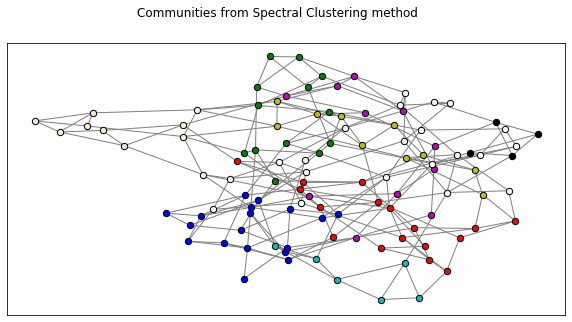

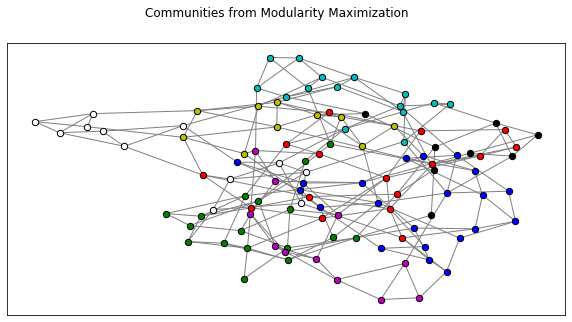

In [193]:
visual_com(SW)

<p>h. Οπτικοποίηση κοινοτήτων SF.</p>

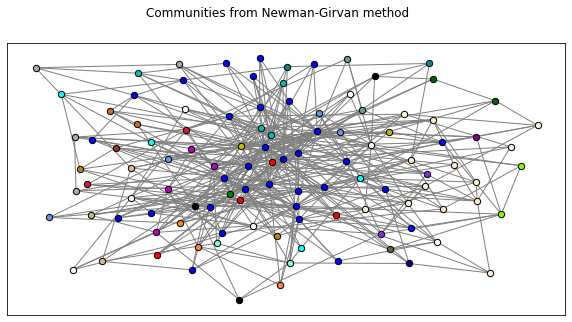

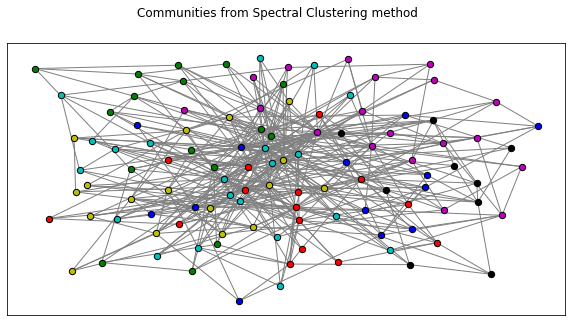

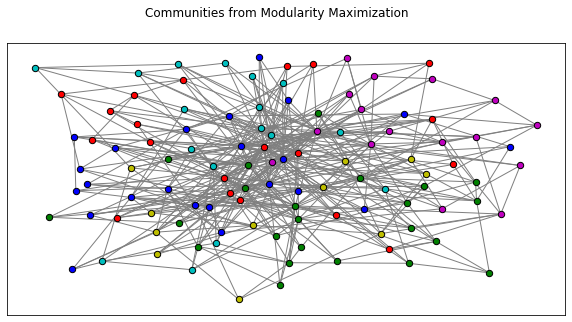

In [194]:
visual_com(SF)